<a href="https://colab.research.google.com/github/7Blessings7/Final-Project-CMS204/blob/main/Pair_32_Code_Labitag_Leo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graphs

The unknown sample is a simple sugar.
Unknown sample is a Hexose!
Sample's molecular weight is: 180.1560000000001 g/mol
Unknown sample is a beta sugar.


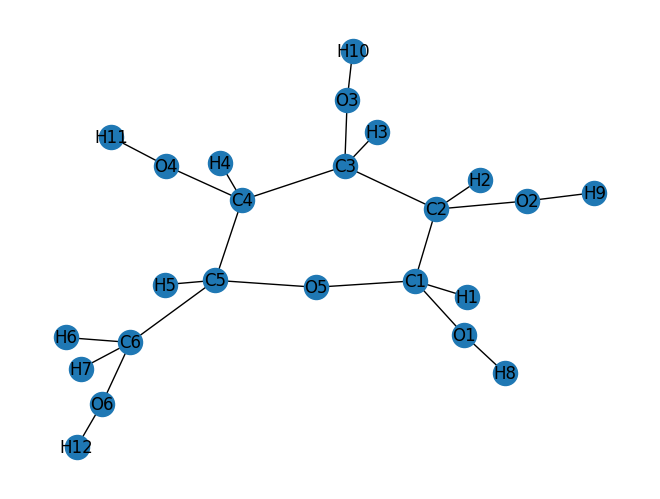

In [ ]:
#Objective: Create a simple program that tells if a given carbohydrate sample is simple or not. 
#           It should accept carbohydrate molecule information 
#           and identify simple sugars (based solely in structure and molecular composition) using 
#           graph data structure.
import networkx as nx
import matplotlib.pyplot as plt

class Carbs:
  def __init__(self, edges=[]):
    self.edges = edges
    self.vertices = []
    self.carb_dict = {}
    for vertex, edge in edges:
      if vertex in self.carb_dict:
        self.carb_dict[vertex].append(edge)
      else:
        self.carb_dict[vertex] = [edge]
        self.vertices.append(vertex)
  

  #Define a function to check if a sample molecule is a simple sugar:
  def is_simple_sugar(self, sample):
    #check if molecule only contains C,H,O atoms & create dictionary of atoms involved in ring formation:
    simple_sugar_atoms = ["C", "H", "O"]
    ring_dict = {}
    
    for vertex in (self.carb_dict):
      if vertex[0] not in simple_sugar_atoms:
        print("The unknown sample is NOT a simple sugar.")
        return
      
      edges = self.carb_dict[vertex]
      for edge in edges:
        if edge[0] not in simple_sugar_atoms:
          print("The unknown sample is NOT a simple sugar.")
          return
        else:
          if vertex[0] != "C" or edge[0] != "C":
            continue
          if vertex in ring_dict:
            ring_dict[vertex].append(edge)
          else:
            ring_dict[vertex] = [edge]

    #check if atoms in ring_dict are connected to at most 2 edges (which ensures ring structure)
    simple = True
    for vertex, edges in ring_dict:
      if len(edge) > 2:
        simple = False
    
    if simple:
      print("The unknown sample is a simple sugar.")
      self.monosaccharide_type(self.vertices)
    else:
      print("The unknown sample is NOT a simple sugar.")



  #Identify type of simple sugar:
  def monosaccharide_type(self, vertices):
    #count the number of carbons in the sample:
    counter = 0
    for vertex in vertices:
      if "C" in vertex:
        counter += 1

    if counter < 3:
      print("Sample is NOT a sugar")
    elif counter == 3:
      print("Unknown sample is a Triose!")
    elif counter == 4:
      print("Unknown sample is a Tetrose!")
    elif counter == 5:
      print("Unknown sample is a Pentose!")
    elif counter == 6:
      print("Unknown sample is a Hexose!")
    elif counter == 7:
      print("Unknown sample is a Heptose!")
    else:
      print("Unknown sample is a Octose or longer!")


  # Calculate the molecular weight of the sample molecule::
  def calculate_molecular_weight(self):
    # Dictionary of atomic weights
    atomic_weights = {'C': 12.011, 'H': 1.008, 'O': 15.999}

    # Initialize total weight to zero
    total_weight = 0

    # Iterate over vertices and edges to calculate molecular weight
    for vertex in self.carb_dict:
      if vertex[0] in atomic_weights:
        total_weight += atomic_weights[vertex[0]]
      else:
        continue

    return total_weight


  # Identify anomeric configuration of the sample molecule:
  def identify_anomeric_config(self):
        for vertex in self.carb_dict:
            if vertex == "C1":
              return "Unknown sample is a beta sugar." if "O" in self.carb_dict[vertex][0] else "Unknown sample is an alpha sugar."
            else:
              continue
        return "Unknown sample does not have a defined anomeric configuration"


  # Visualize graph of sample molecule:
  def visualize_graph(self):
        G = nx.Graph()
        G.add_edges_from(self.edges)
        nx.draw(G, with_labels=True)
        plt.show()


#TESTING:
# Create a glucose molecule using tuples to represent the molecular bonds (edges)
glucose_bonds = [("C1","O1"), ("C1","O5"), ("C1","C2"), ("C1","H1"),
                 ("C2","H2"), ("C2","C1"), ("C2","C3"), ("C2","O2"),
                 ("C3","O3"), ("C3","C2"), ("C3","C4"), ("C3","H3"),
                 ("C4","H4"), ("C4","C3"), ("C4","C5"), ("C4","O4"),
                 ("C5","C6"), ("C5","C4"), ("C5","O5"), ("C5","H5"),
                 ("C6","H6"), ("C6","H7"), ("C6","O6"), ("C6","C5"),
                 ("O1", "H8"), ("O1", "C1"),
                 ("O2", "C2"), ("O2", "H9"),
                 ("O3", "H10"), ("O3", "C3"),
                 ("O4", "C4"), ("O4", "H11"),
                 ("O5", "C5"), ("O5", "C1"),
                 ("O6", "C6"), ("O6", "H12"),
                 ("H1", "C1"), ("H2", "C2"), ("H3", "C3"), ("H4", "C4"), ("H5", "C5"), ("H6", "C6"),
                 ("H7", "C6"), ("H8", "O1"), ("H9", "O2"), ("H10", "O3"), ("H11", "O4"), ("H12", "O6")
                 ]

# Input tuples into Carbs
glucose = Carbs(glucose_bonds)

# Test if glucose is a simple sugar
glucose.is_simple_sugar(glucose_bonds)

# Calculate molecular weight of sample:
print("Sample's molecular weight is:", glucose.calculate_molecular_weight(), "g/mol")

# Identify anomeric configuration of the sample molecule:
print(glucose.identify_anomeric_config())

# Visualize graph of sample molecule:
glucose.visualize_graph()
